In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

In [2]:
customers = pd.read_csv("Ecommerce Customers.csv")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
sns.set_style('darkgrid') 

In [7]:
sns.set_palette('coolwarm')

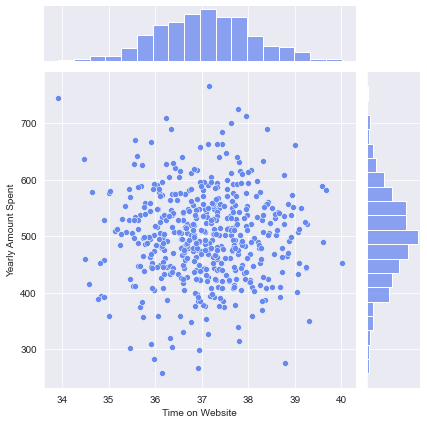

In [8]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

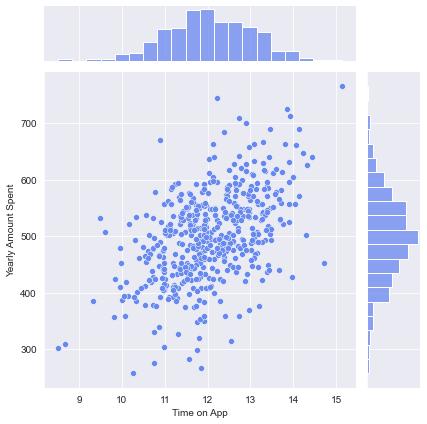

In [9]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

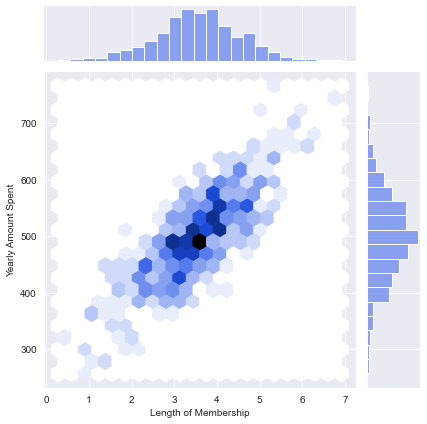

In [10]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=customers, kind='hex')

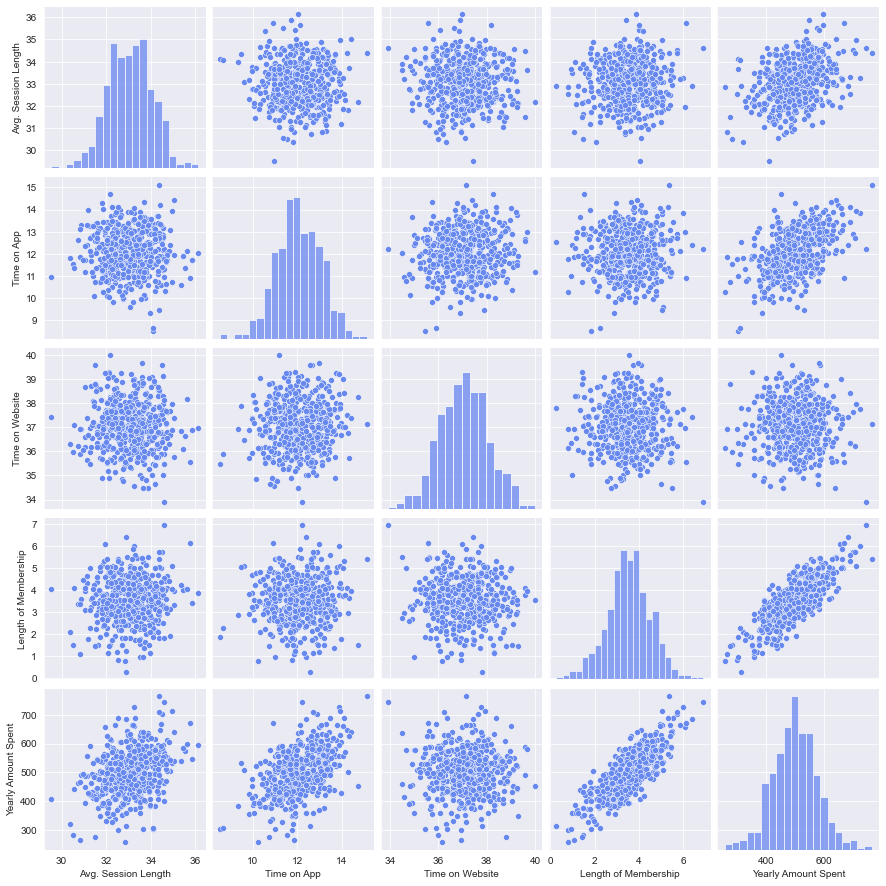

In [11]:
sns.pairplot(customers) 

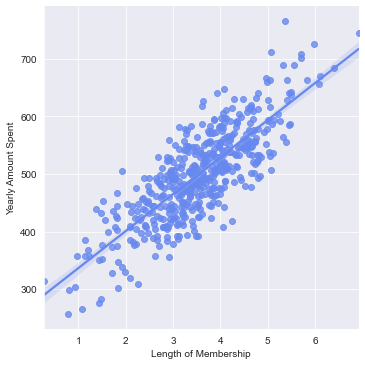

In [12]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

In [13]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
y = customers['Yearly Amount Spent']

In [15]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [22]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'predictions')

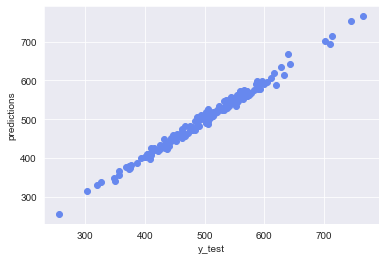

In [23]:
plt.scatter(y_test, predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")

In [24]:
from sklearn import metrics

In [25]:
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  7.2281486534308295
MSE:  79.8130516509743
RMSE:  8.933815066978626


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

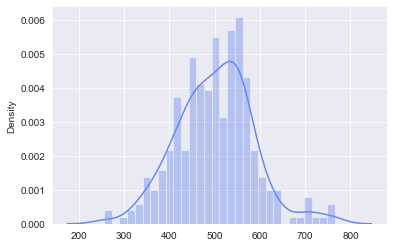

In [26]:
sns.distplot((y_test,predictions), bins=30)

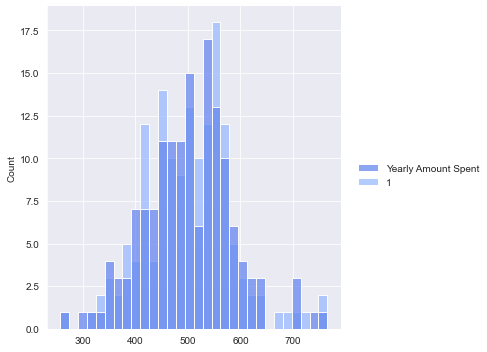

In [27]:
sns.displot((y_test,predictions), bins=30)

<AxesSubplot:ylabel='Count'>

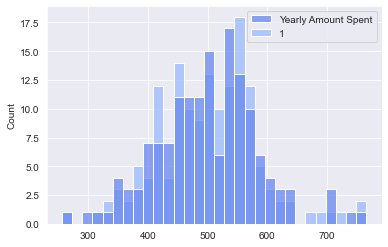

In [28]:
sns.histplot((y_test,predictions), bins=30)

In [29]:
coefficients = pd.DataFrame(lm.coef_, X.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [30]:
import pickle

In [31]:
pickle.dump(lm, open('ecommerce model.pkl', 'wb'))

In [32]:
loadedModel = pickle.load(open('ecommerce model.pkl', 'rb'))

In [33]:
loadedModel

LinearRegression()

In [34]:
#X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

loadedModel.predict([[30, 15, 30, 3]])

array([499.91553871])